In [1]:
import sys
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append("/home/photon/code/Qfunction/")

In [3]:
import Qfunction as Q

In [4]:
cd "/home/photon/data/06-18-2014"

/home/photon/data/06-18-2014


In [5]:
ls

10-15-21_raw.npy  10-33-01_raw.npy  10-49-32_raw.npy
10-19-45_raw.npy  10-37-26_raw.npy  10-53-56_raw.npy
10-27-23_raw.npy  10-43-50_raw.npy  10-59-38_raw.npy


In [6]:
data = np.load("10-37-26_raw.npy")
vacuum = np.load("10-15-21_raw.npy")

In [7]:
Kp_vac = np.average(vacuum,axis=(1,2))

In [8]:
LO_amp = 13202
scaled_vc = np.sqrt(2.0)/LO_amp*(data - Kp_vac.reshape(600,1,1))

In [9]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

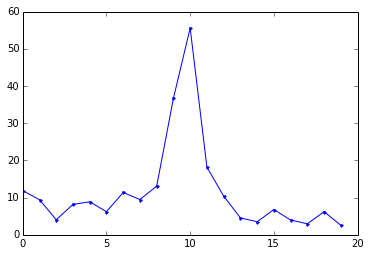

In [12]:
plot(avg_n_quick[160:180],".-")  # look at the modes with their amplitudes

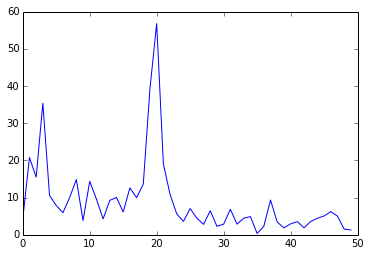

In [25]:
Qn = np.zeros(300)
for i in range(150,200):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    X,Y,Z = Q.kernel_estimate(x,y)
    Qn[i] = Q.avg_n(X,Y,Z)

plot(Qn[150:200])

In [13]:
mode = 170
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = np.abs(scaled_vc[mode,:,:]).std(axis=0)

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

(0, 1.7000000000000002)

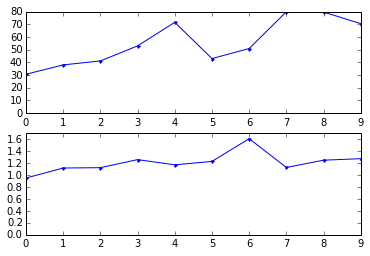

In [14]:
subplot(211)
plot(check_n,".-")
ylim(ymin=0)
subplot(212)
plot(check_var,".-")
ylim(ymin=0)

Now pick the best section of the rounds: 10:40 (not sure if this matters much, but worth checking)

In [15]:
output = scaled_vc[mode,:,:].flatten('F')

In [16]:
x = np.real(output)
y = np.imag(output)

In [17]:
0.5*(np.abs(output).mean())**2  # the easy calculation

55.580333595078436

In [18]:
Q.est_avg_n(x,y)  # the estimated photon number from x and y

57.64743505245066

In [19]:
X,Y,Z = Q.kernel_estimate(x,y)

In [20]:
n = Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n> = ", n

<n> =  56.7853283248


In [21]:
Q.std_n(X,Y,Z)  # should be sqrt(<n>)

21.119394049795876

In [22]:
sqrt(n)  # not that close ... yet?

7.5356040451157522

In [23]:
Q.std_n(X,Y,Z) / sqrt(n)

2.8026146176675168

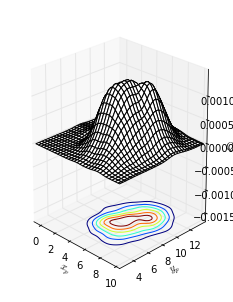

In [24]:
figure = Q.qsurf(x,y)  # good looking figures though!

In [54]:
# Just a quick check from the Q-function, n should be about half of the sum of squares of quadratures:
0.5*(6**2 + 8**2)

50.0

In [32]:
figure.savefig("test.pdf")

In [30]:
ls

10-16-02_raw.npz  10-37-47_raw.npz  11-01-17_raw.npz  11-35-17_raw.npz
10-17-35_raw.npz  10-42-10_raw.npz  11-03-25_raw.npz  11-37-40_raw.npz
10-19-46_raw.npz  10-44-05_raw.npz  11-05-04_raw.npz  11-39-30_raw.npz
10-21-29_raw.npz  10-46-22_raw.npz  11-07-01_raw.npz  11-42-08_raw.npz
10-23-01_raw.npz  10-48-14_raw.npz  11-13-03_raw.npz  11-43-38_raw.npz
10-24-41_raw.npz  10-49-58_raw.npz  11-26-54_raw.npz  test.pdf
10-27-49_raw.npz  10-54-50_raw.npz  11-29-18_raw.npz
10-30-17_raw.npz  10-56-29_raw.npz  11-32-02_raw.npz
10-33-38_raw.npz  10-59-30_raw.npz  11-33-34_raw.npz
